# HACKATON SANTE 

Le 28/10/2016

https://www.etalab.gouv.fr/retour-sur-le-premier-hackathon-donnees-de-sante

# Dépassement d'honoraires par département

## Pour les généralistes

In [1]:
%matplotlib inline

write_path = '/Users/mayliscotadze/Documents/workspace/hono'
file_to_extract1 = 'gen.csv'
file_to_extract2 = 'spe.csv'


import pandas as pd
import numpy as np
from os.path import join
import matplotlib.pyplot as plt

file_to_read = join(write_path, file_to_extract1)
data1 = pd.read_csv(file_to_read, sep = ',', skiprows = 1, header = None)


df1_hono = pd.DataFrame()
df1_hono['dep'] = data1.iloc[:,1]
df1_hono['montant_depassement_hono'] = data1.iloc[:,4]

for i in range(len(df1_hono)):
    a = df1_hono.iloc[i,1].replace(u'\xa0','')
    df1_hono.iloc[i,1] = int(a)


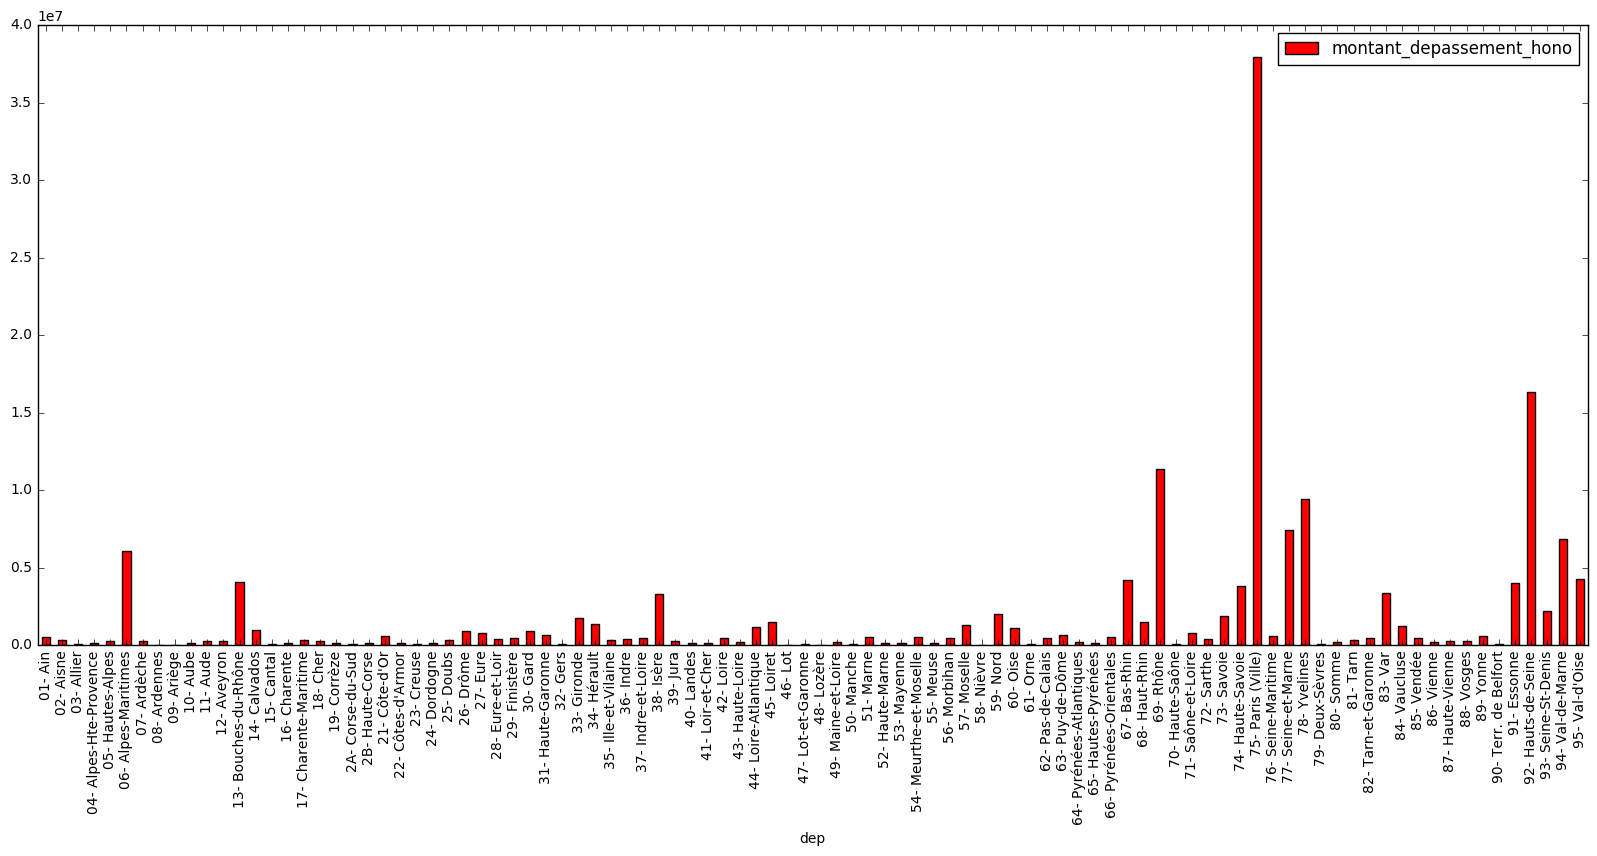

In [2]:
df2 = df1_hono.set_index(['dep'])

df2.plot(kind ='bar', figsize = (20,8), color = 'red')

In [22]:
df2.head(5)

,montant_depassement_hono
dep,
01- Ain,544536
02- Aisne,316633
03- Allier,55748
04- Alpes-Hte-Provence,101450
05- Hautes-Alpes,259858


#### Sans Paris

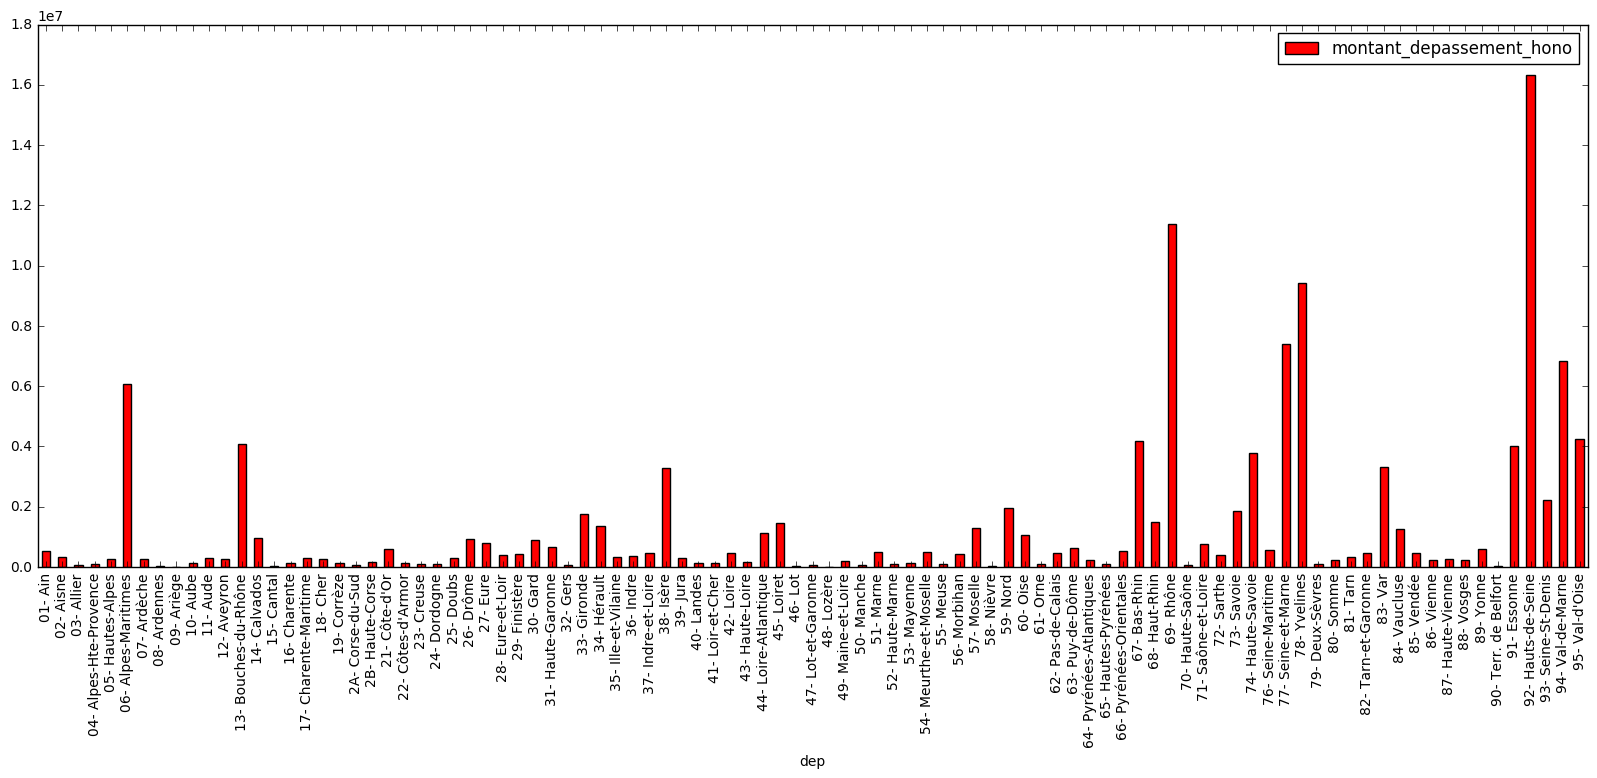

In [3]:
df2_sans_paris = df2.drop('75- Paris (Ville)')
df2_sans_paris.plot(kind = 'bar', figsize = (20,7), color = 'red')

## Pour les spécialistes

In [4]:
file_to_read = join(write_path, file_to_extract2)
data2 = pd.read_csv(file_to_read, sep = ',', skiprows = 1, header = None)


df3_hono = pd.DataFrame()
df3_hono['dep'] = data2.iloc[:,1]
df3_hono['montant_depassement_hono'] = data2.iloc[:,4]

for i in range(len(df3_hono)):
    b = df3_hono.iloc[i,1].replace(u'\xa0','')
    df3_hono.iloc[i,1] = int(b)

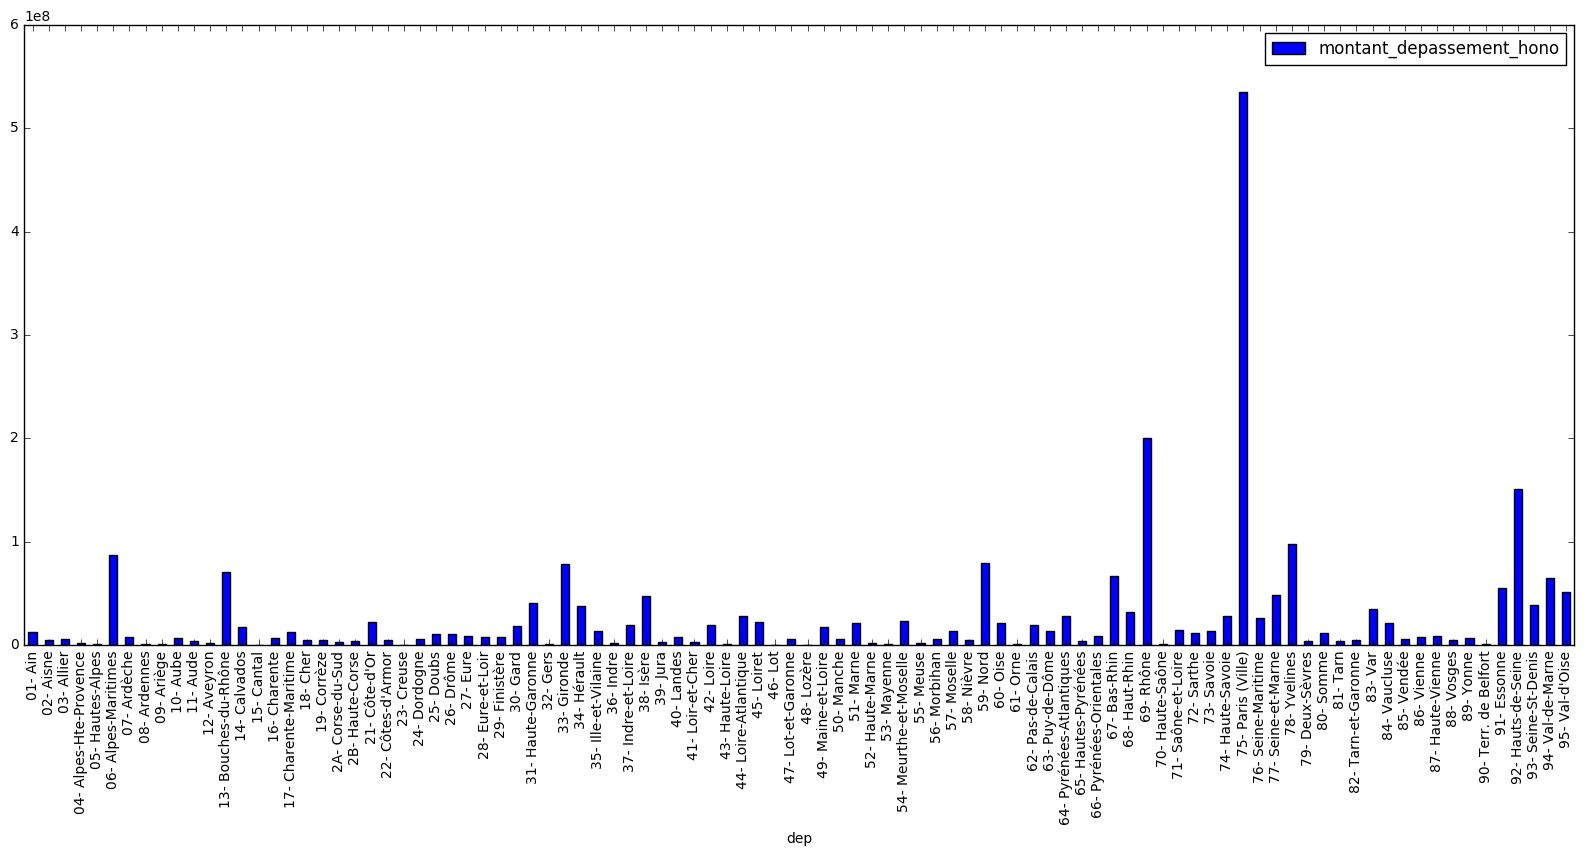

In [5]:

df4 = df3_hono.set_index(['dep'])
df4.plot(kind ='bar', figsize = (20,8))

## Au global

In [6]:
df5 = df2 + df4

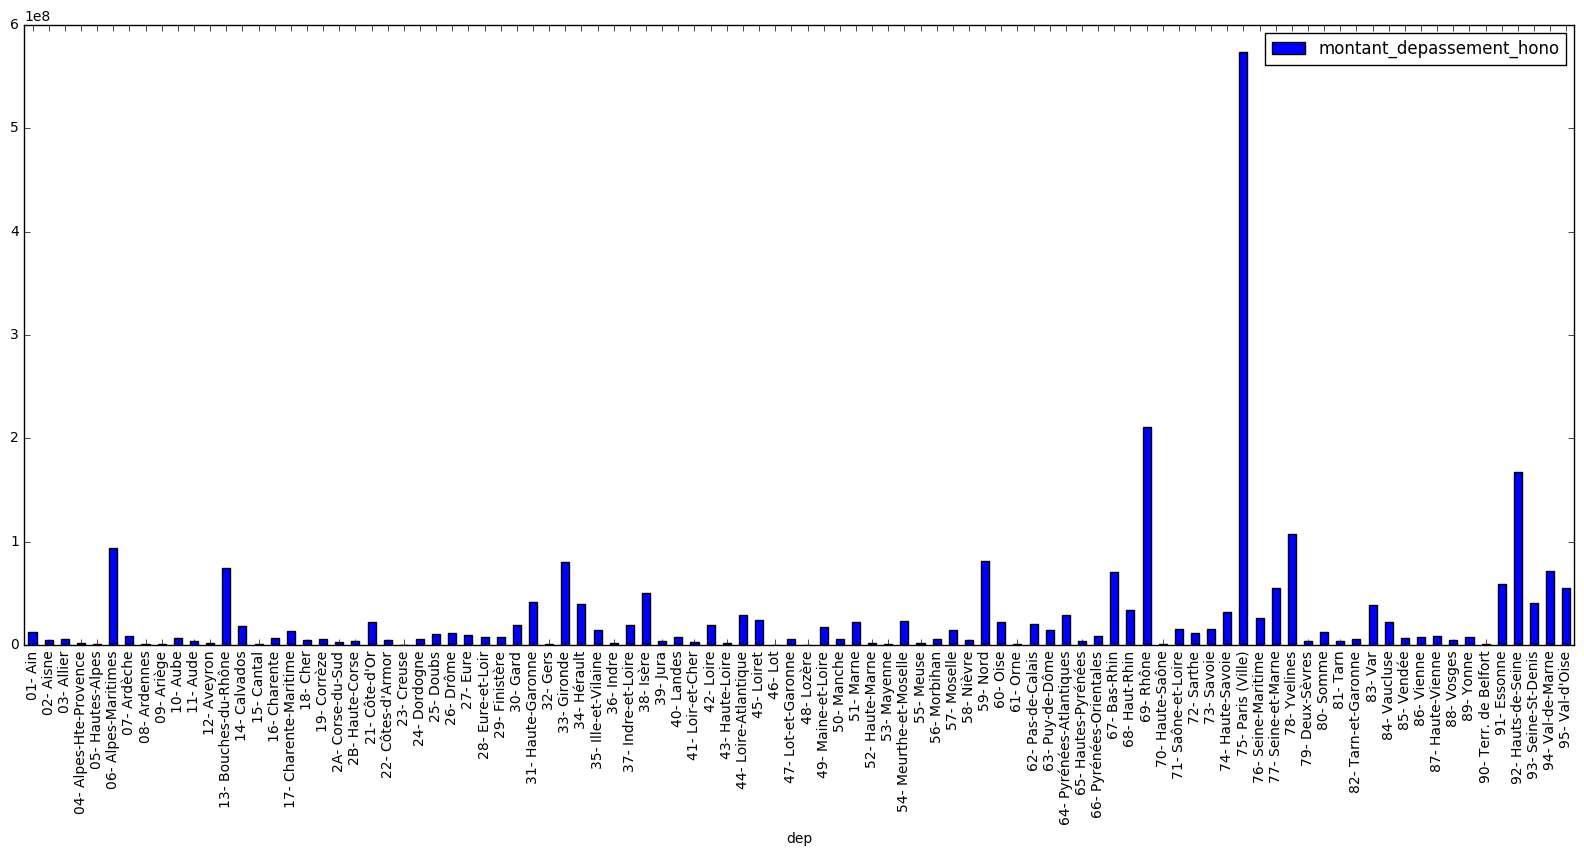

In [7]:
df5.plot(kind ='bar', figsize = (20,8))

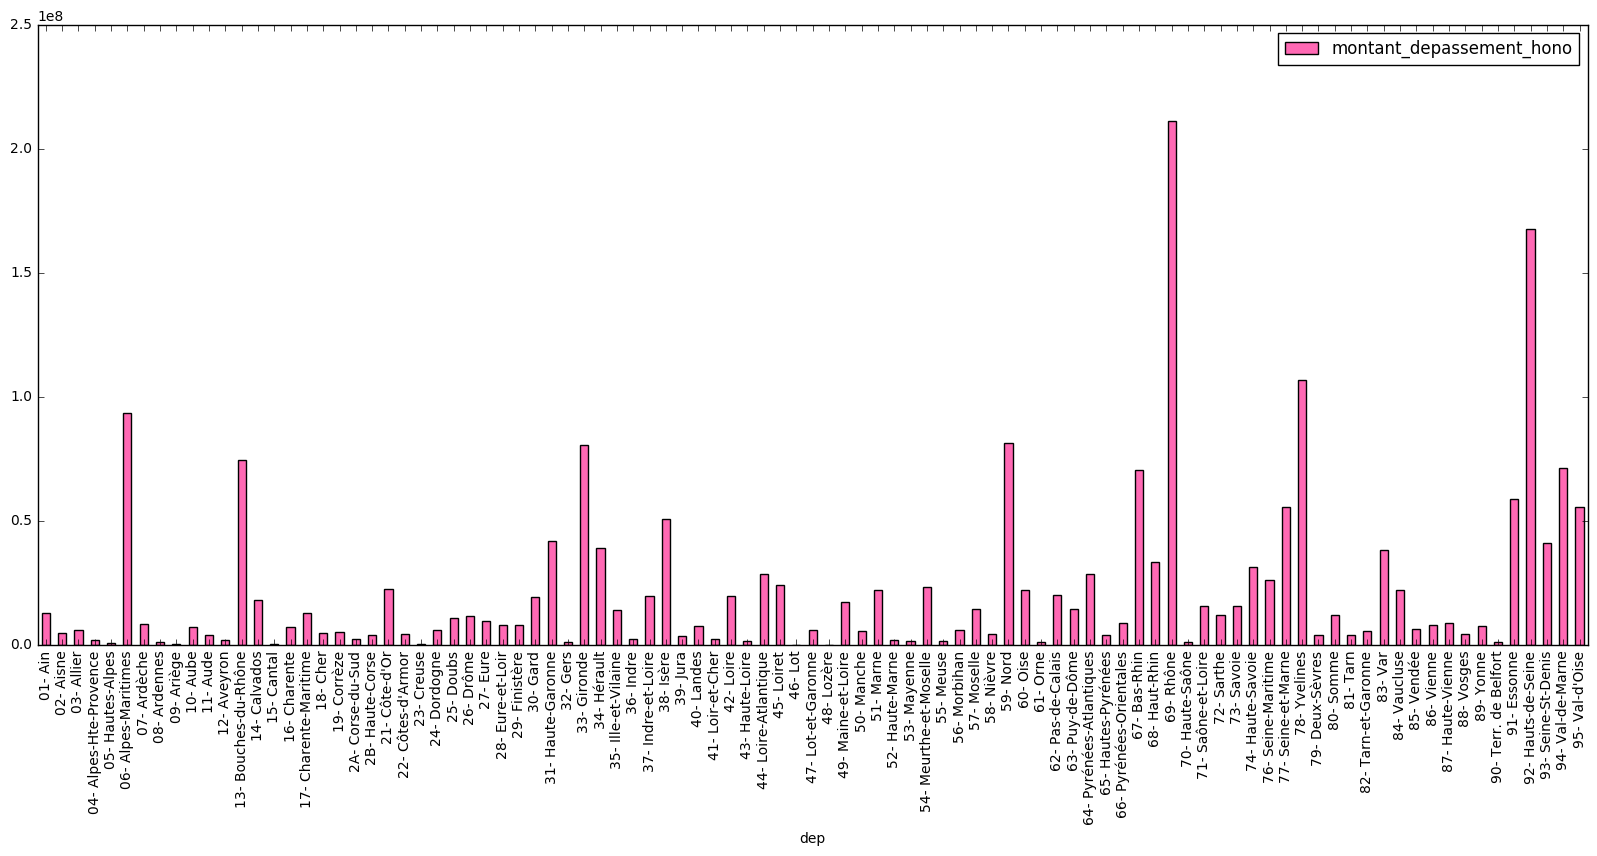

In [8]:
df5_sans_paris = df5.drop('75- Paris (Ville)')
df5_sans_paris.plot(kind ='bar', figsize = (20,8), color ='hotpink')

# Densité des médecins par département par type de médecine

## La démographie des médecins par région pour l'année 2014

In [9]:

write_path = '/Users/mayliscotadze/Documents/workspace/data'
file_to_extract = 'rpps-medecins-tab2_30843938199461.csv'
return_csv_name = 'med_par_dep_2014_regroupe.csv'
csv_sep = ';'

import pandas as pd
import numpy as np
from os.path import join
import matplotlib.pyplot as plt

file_to_read = join(write_path, file_to_extract)
data = pd.read_csv(file_to_read, sep = ';', skiprows = 16, header = None)

data_cleaned = pd.DataFrame()

for i in range(len(data)):
    line = data.iloc[i].str.split(';').tolist()
    line = pd.DataFrame(line)
    data_cleaned = data_cleaned.append(line)

data_cleaned_new = data_cleaned.reset_index().drop([200,201])
data_cleaned_2 = data_cleaned.drop('index')
data_cleaned_2.columns = ['dep', 'type_med', 'dens_med']

df = data_cleaned_2.pivot('dep','type_med','dens_med')
df.head(5)

type_med,"""Ensemble des spécialités d'exercice""","""Médecine générale"""
dep,,
01 - Ain,1192,678
02 - Aisne,1237,616
03 - Allier,955,489
04 - Alpes-de-Haute-Provence,498,304
05 - Hautes-Alpes,598,332


In [10]:
type(df.iloc[1,1])

str

In [11]:
for j in range(len(df)):
    df.iloc[j,0]= int(df.iloc[j,0])
    df.iloc[j,1]= int(df.iloc[j,1])

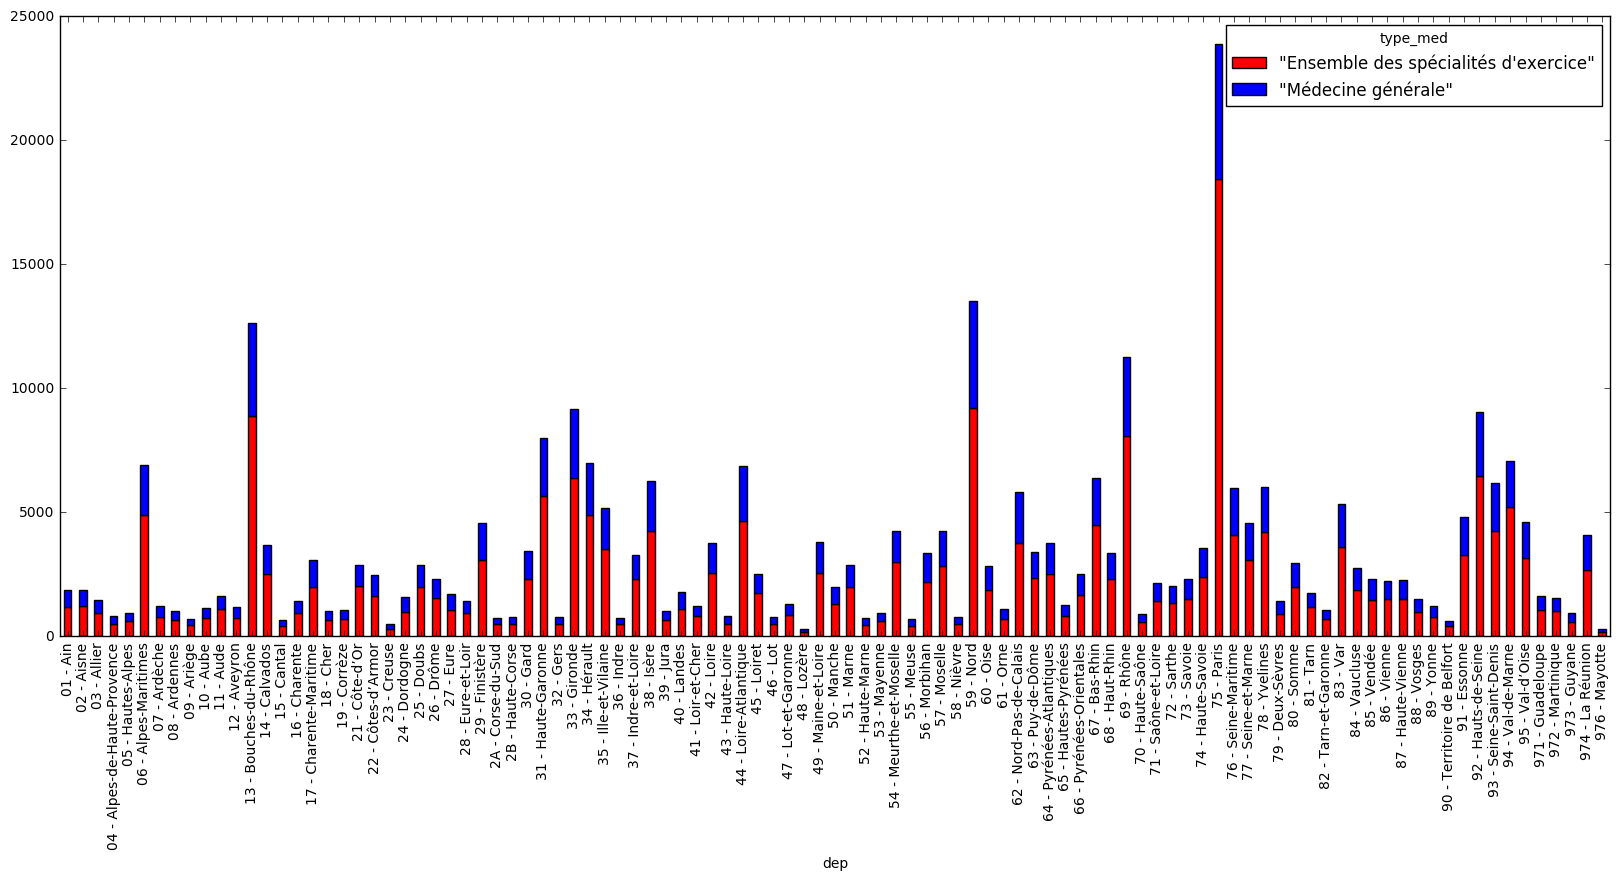

In [12]:
df.plot(kind ='bar', figsize = (20,8), stacked=True , color=('r','b'))

# La démographie de la population par département par age pour 2014

In [13]:
file_to_extract = 'estim-pop-dep-sexe-aq-1975-2014.xls'
return_csv_name = 'pop_par_dep_par_an_regroupe.csv'
csv_sep = ';'

file_to_read = join(write_path, file_to_extract)
table = pd.read_excel(file_to_read, header = 0, skip_footer = 4, skiprows = 4, index_col = None, sheetname = str(2014))

# Supprimer les colonnes hommes + femme, ne garder que le total général
t1 = table.drop(table.columns[24:], axis = 1)

# On regroupe les valeurs par tranches d'âge <30 et >=30 ans
table_inf_30 = t1.iloc[:,2:8].sum(axis = 1)
table_sup_30 = t1.iloc[:,8:22].sum(axis = 1)
t2 = t1.drop(t1.columns[2:], axis =1)
table_globale = pd.concat([t2, table_inf_30, table_sup_30], axis = 1, join = 'inner')
table_globale.columns = ['num_dep','dep2','pop_inf_30', 'pop_sup_30']
table_globale = table_globale.drop(96)

table_globale_new = table_globale.iloc[:,1:]

In [14]:
df6 = table_globale_new.set_index('dep2')
df6.head(5)

,pop_inf_30,pop_sup_30
dep2,,
Ain,231539,395866
Aisne,196571,343838
Allier,102520,240073
Alpes-de-Haute-Provence,50058,112380
Hautes-Alpes,44510,97401


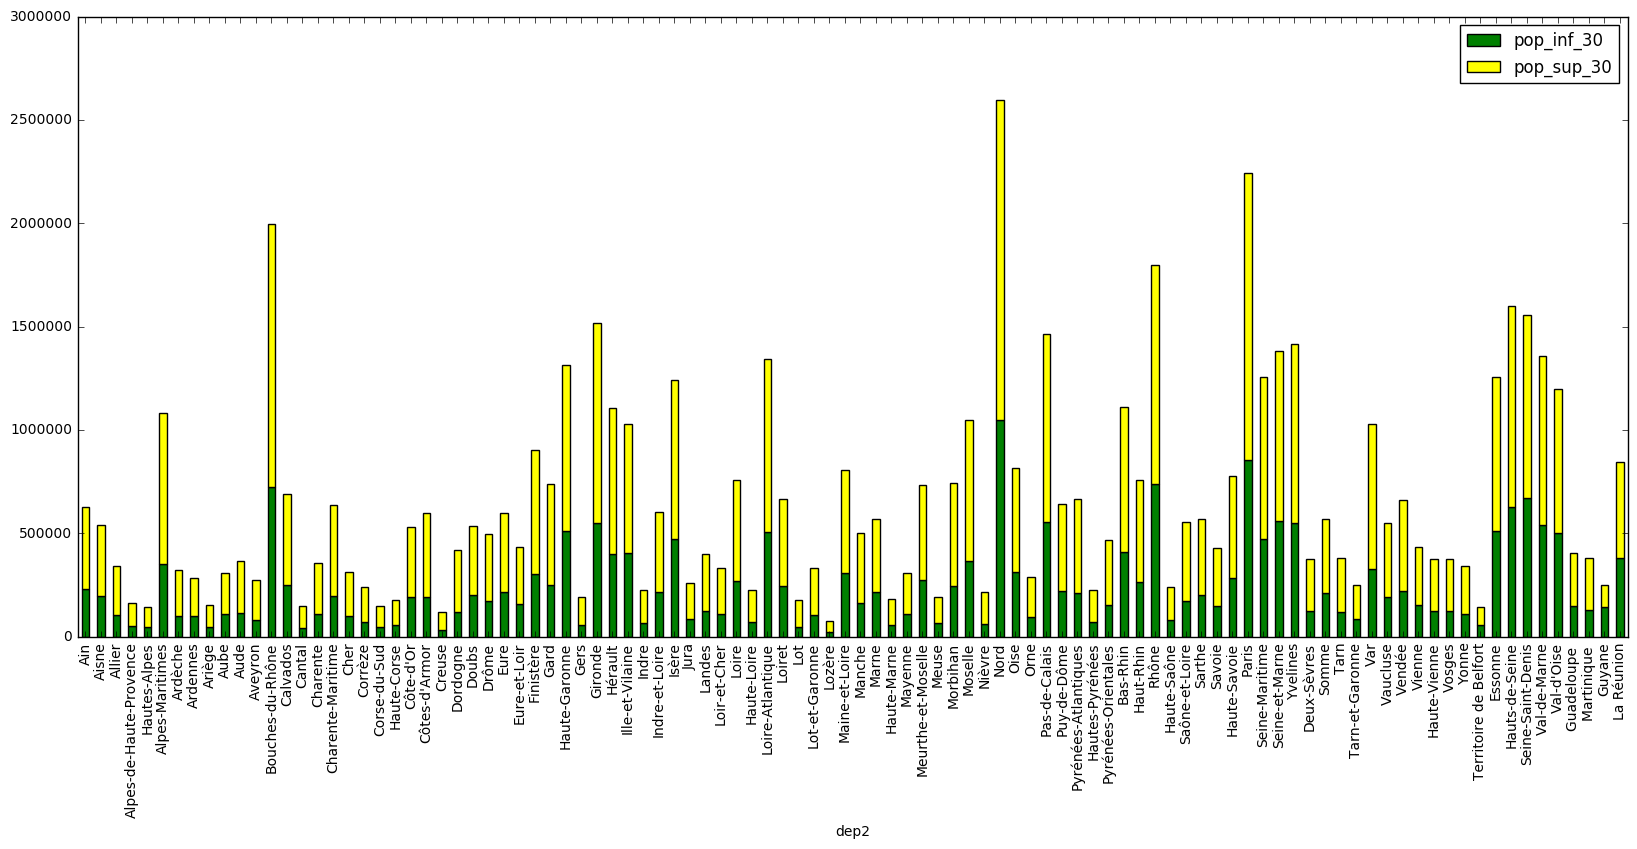

In [15]:
df6.plot(kind ='bar', figsize = (20,8), stacked=True , color=('green','yellow'))

# Le montant des dépassements d'honoraire en fonction de la densité des médecins

In [16]:
# La densité totale des médecins (géné et spé)

df_dens_med = df.iloc[:,0] + df.iloc[:,1]
df_dens_med = pd.DataFrame(df_dens_med)
df_dens_med2 = df_dens_med.reset_index()

In [30]:
df8 = df5.reset_index()
df9 = pd.concat([df_dens_med2,df8], axis = 1).drop('dep', axis=1)
df9.columns = ['dens_med', 'depassmnt_hono']
df9 = df9.iloc[:95,:]

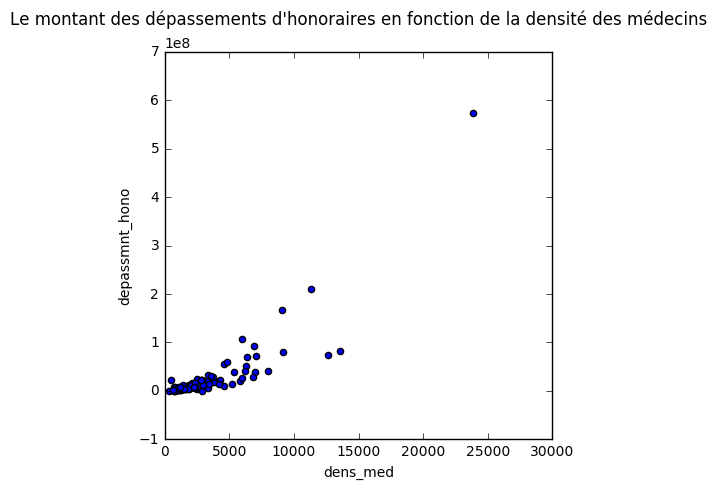

In [42]:
df9.plot(kind='scatter', x = 'dens_med', y='depassmnt_hono', xlim = [0,30000], figsize = (5,5), title ="Le montant des dépassements d'honoraires en fonction de la densité des médecins\n")

In [23]:
df_dens_pop = df6.iloc[:,0] + df6.iloc[:,1]
df_dens_pop = pd.DataFrame(df_dens_pop)
df_dens_pop2 = df_dens_pop.reset_index()

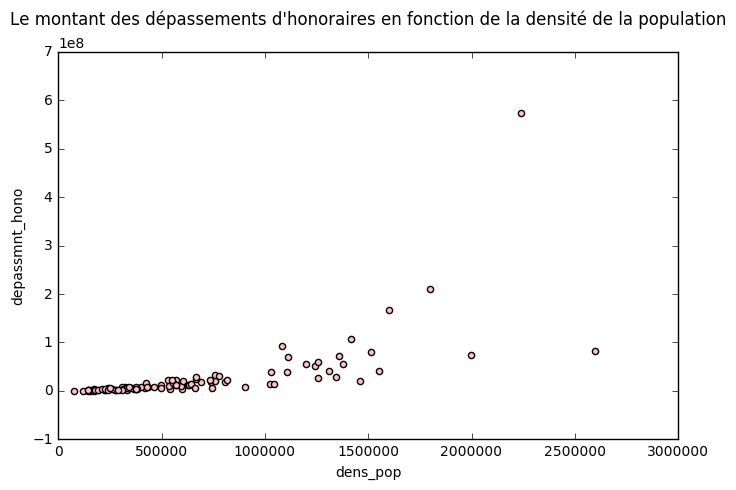

In [41]:
df10 = pd.concat([df_dens_pop2,df8], axis = 1).drop('dep2', axis=1).drop('dep', axis=1)
df10.columns = ['dens_pop', 'depassmnt_hono']
df10.plot(kind='scatter',x = 'dens_pop', y='depassmnt_hono', xlim = [0,3000000], color = 'pink', figsize = (8,5),title ="Le montant des dépassements d'honoraires en fonction de la densité de la population\n")

